Process raw data and prodcue images



In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageDraw

%matplotlib inline

In [2]:
# code from https://www.kaggle.com/c/quickdraw-doodle-recognition/discussion/67036
def draw_it(raw_strokes):
    image = Image.new("P", (255,255), color=255)
    image_draw = ImageDraw.Draw(image)

    for stroke in eval(raw_strokes):
        for i in range(len(stroke[0])-1):

            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=6)
    return np.array(image)

In [3]:
! ls data


test_simplified.csv


In [34]:
ants = pd.read_csv("data/test_simplified.csv")

In [35]:
ants.tail()

,key_id,countrycode,drawing
112194,9999946504414373,US,"[[[103, 67, 37, 10, 2, 0, 11, 24, 43, 78, 117,..."
112195,9999967586702768,MY,"[[[89, 119, 136, 188], [220, 206, 202, 199]], ..."
112196,9999968529902445,US,"[[[52, 24, 11, 2, 0, 19, 31, 43, 37, 39, 48, 7..."
112197,9999969540362833,US,"[[[32, 25, 15, 2, 0, 12, 4, 6, 13, 12, 18, 33,..."
112198,9999996442242305,RS,"[[[33, 33, 148, 161, 159, 143, 135, 55, 0], [1..."


In [36]:
col = ['key_id','drawing', ]

probably a good idea to remove or weight images that werent recognized less

In [37]:
ants2 = ants[col]

In [38]:
d = ants2.set_index('key_id').to_dict()

In [40]:
d.keys()

dict_keys(['drawing'])

In [42]:
imgs = d["drawing"]


In [45]:
from pathlib import Path
save_dir = Path("testtest")

In [47]:
for key, value in imgs.items():

    save_dir.mkdir(parents=True, exist_ok=True)
    img = draw_it(value)
    name = str(key)+".jpeg"
    im = Image.fromarray(img)
    im.save(save_dir/name,)

KeyboardInterrupt: 

In [11]:
ants2.to_dict("key_id")

ValueError: orient 'key_id' not understood

In [12]:
ants.drawing.dtype

dtype('O')

In [91]:
# import ast

In [111]:
# ant = ast.literal_eval(ants.iloc[1].drawing)

In [114]:
len(ants.index)


151623

In [26]:
ant = ants2.iloc[112194].drawing

In [106]:
#test_raw.loc[first_ten_ids, 'drawing'].values

In [107]:
ant

'[[[102, 63, 14, 2, 0, 9, 29, 51, 100, 142, 181, 203, 216, 213, 197, 177, 152, 114, 106], [90, 85, 85, 90, 108, 124, 139, 149, 154, 145, 144, 134, 121, 114, 104, 101, 89, 81, 83]], [[192, 193, 209, 218], [103, 93, 54, 50]], [[205, 220], [114, 52]], [[201, 198, 220, 243], [139, 142, 167, 174]], [[204, 229, 248, 255], [131, 158, 172, 173]], [[90, 93, 89, 107, 122, 132, 135, 131], [99, 79, 16, 1, 2, 19, 45, 87]], [[94, 92, 95, 101, 115, 121, 129, 130, 128], [151, 181, 192, 203, 217, 211, 182, 158, 157]], [[18, 13, 43, 53, 62, 63, 56, 37, 20], [123, 98, 96, 102, 114, 123, 136, 137, 122]]]'

In [27]:
x = draw_it(ant)

In [109]:
x.shape

(255, 255)

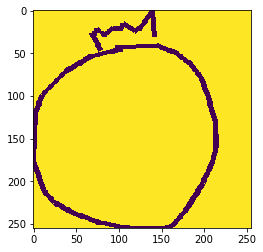

In [28]:
imshow(x)

In [30]:
x[:,125:]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [1]:
# trn,val = [folder_source(path, o) for o in (trn_name, val_name)]
x,y = [ 3* i for i in('hi', 'bro')]


In [32]:
im = Image.fromarray(x)

In [33]:
im.save("test.jpeg")

In [3]:
y

'brobrobro'

In [1]:
from pathlib import Path

In [2]:
path = "data/train/"

In [4]:
x = [i  for i in Path(path).iterdir()]

In [6]:
import pickle

In [9]:
! ls images/kangaroo/

data.pickle


In [10]:
kanagro = pickle.load(open("images/kangaroo/data.pickle", "rb"))